In [35]:
# install keras and seaborn in case you don't have it yet
!pip install keras

!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
dataset_path_red = keras.utils.get_file("winequality-red.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

In [5]:
dataset_path_white = keras.utils.get_file("winequality-white.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv")

In [6]:
column_names = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
                'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
raw_dataset_red = pd.read_csv(dataset_path_red, names=column_names,
                      na_values = "None", comment='\t',
                      sep=";", skipinitialspace=False, header = 0)

dataset_red = raw_dataset_red.copy()
dataset_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
raw_dataset_white = pd.read_csv(dataset_path_white, names=column_names,
                      na_values = "None", comment='\t',
                      sep=";", skipinitialspace=False, header = 0)

dataset_white = raw_dataset_white.copy()
dataset_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
dataset_red.isna().sum() # no na values, so nothing do drop!

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
dataset_white.isna().sum() # no na values, so nothing do drop!

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
train_red = dataset_red.sample(frac=0.8,random_state=0)
test_red = dataset_red.drop(train_red.index)

In [11]:
train_white = dataset_white.sample(frac=0.8,random_state=0)
test_white = dataset_white.drop(train_white.index)

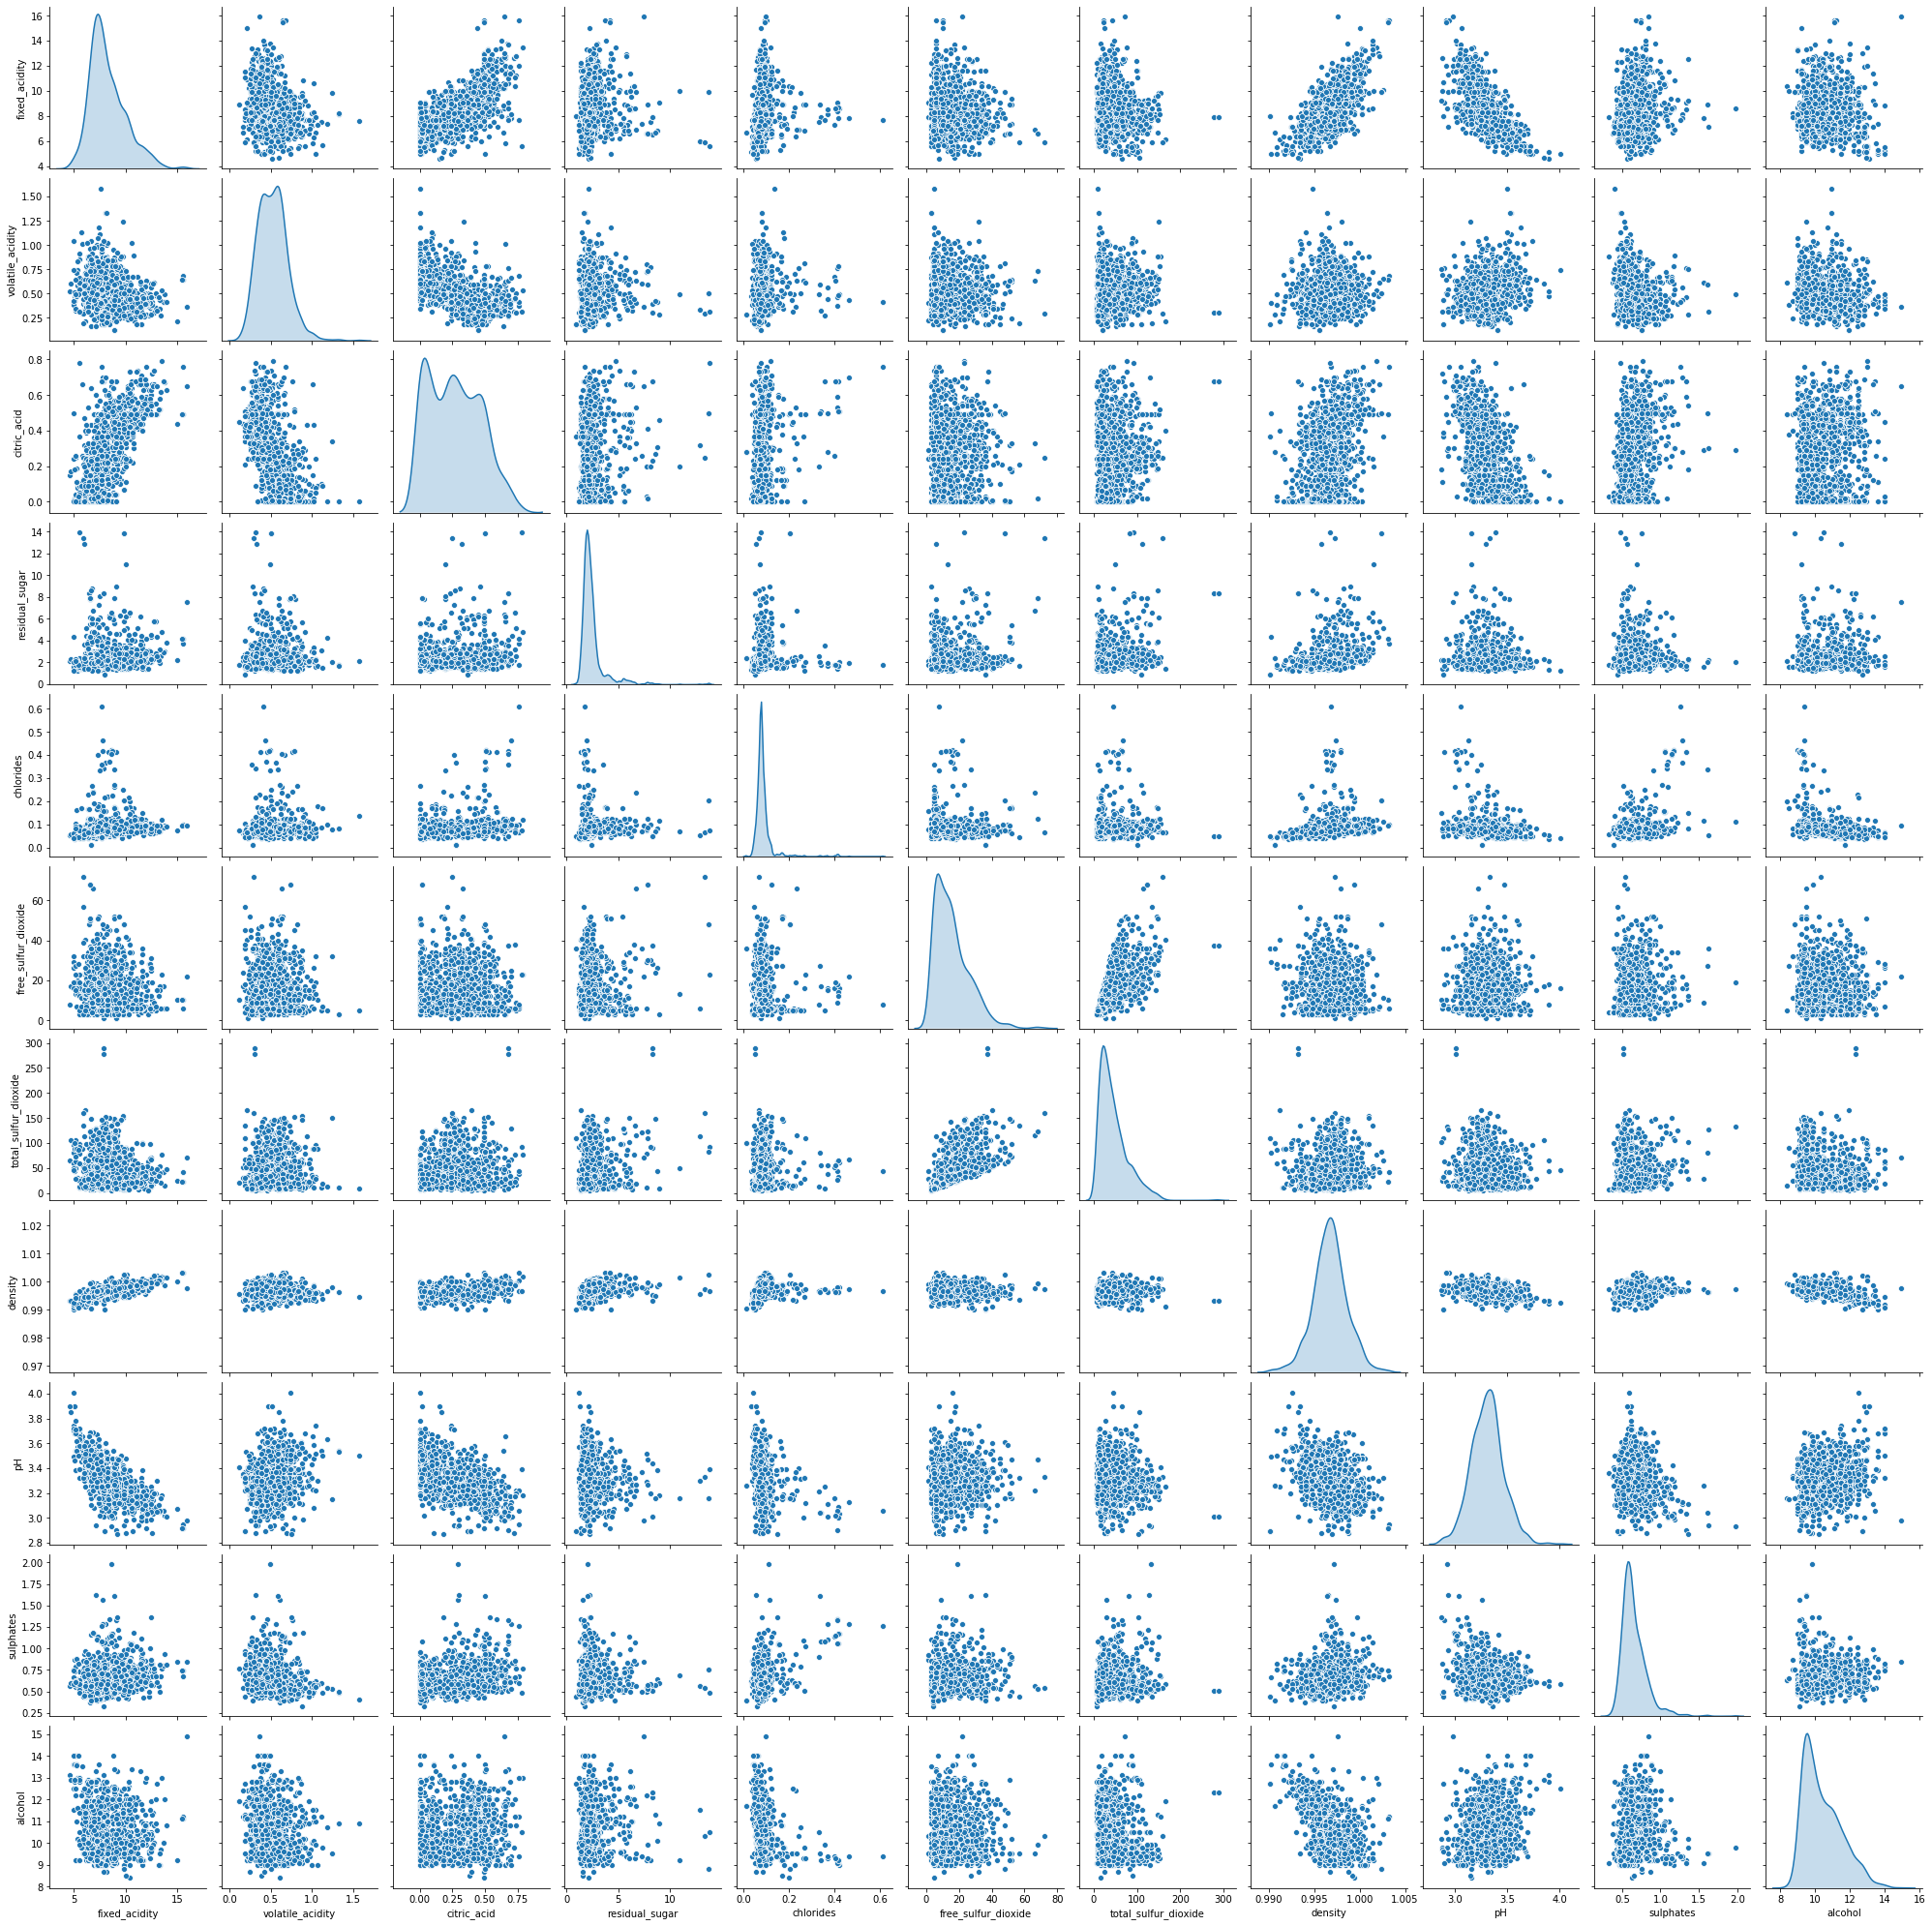

In [12]:
sns.pairplot(train_red[["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides",
                "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]], diag_kind="kde")

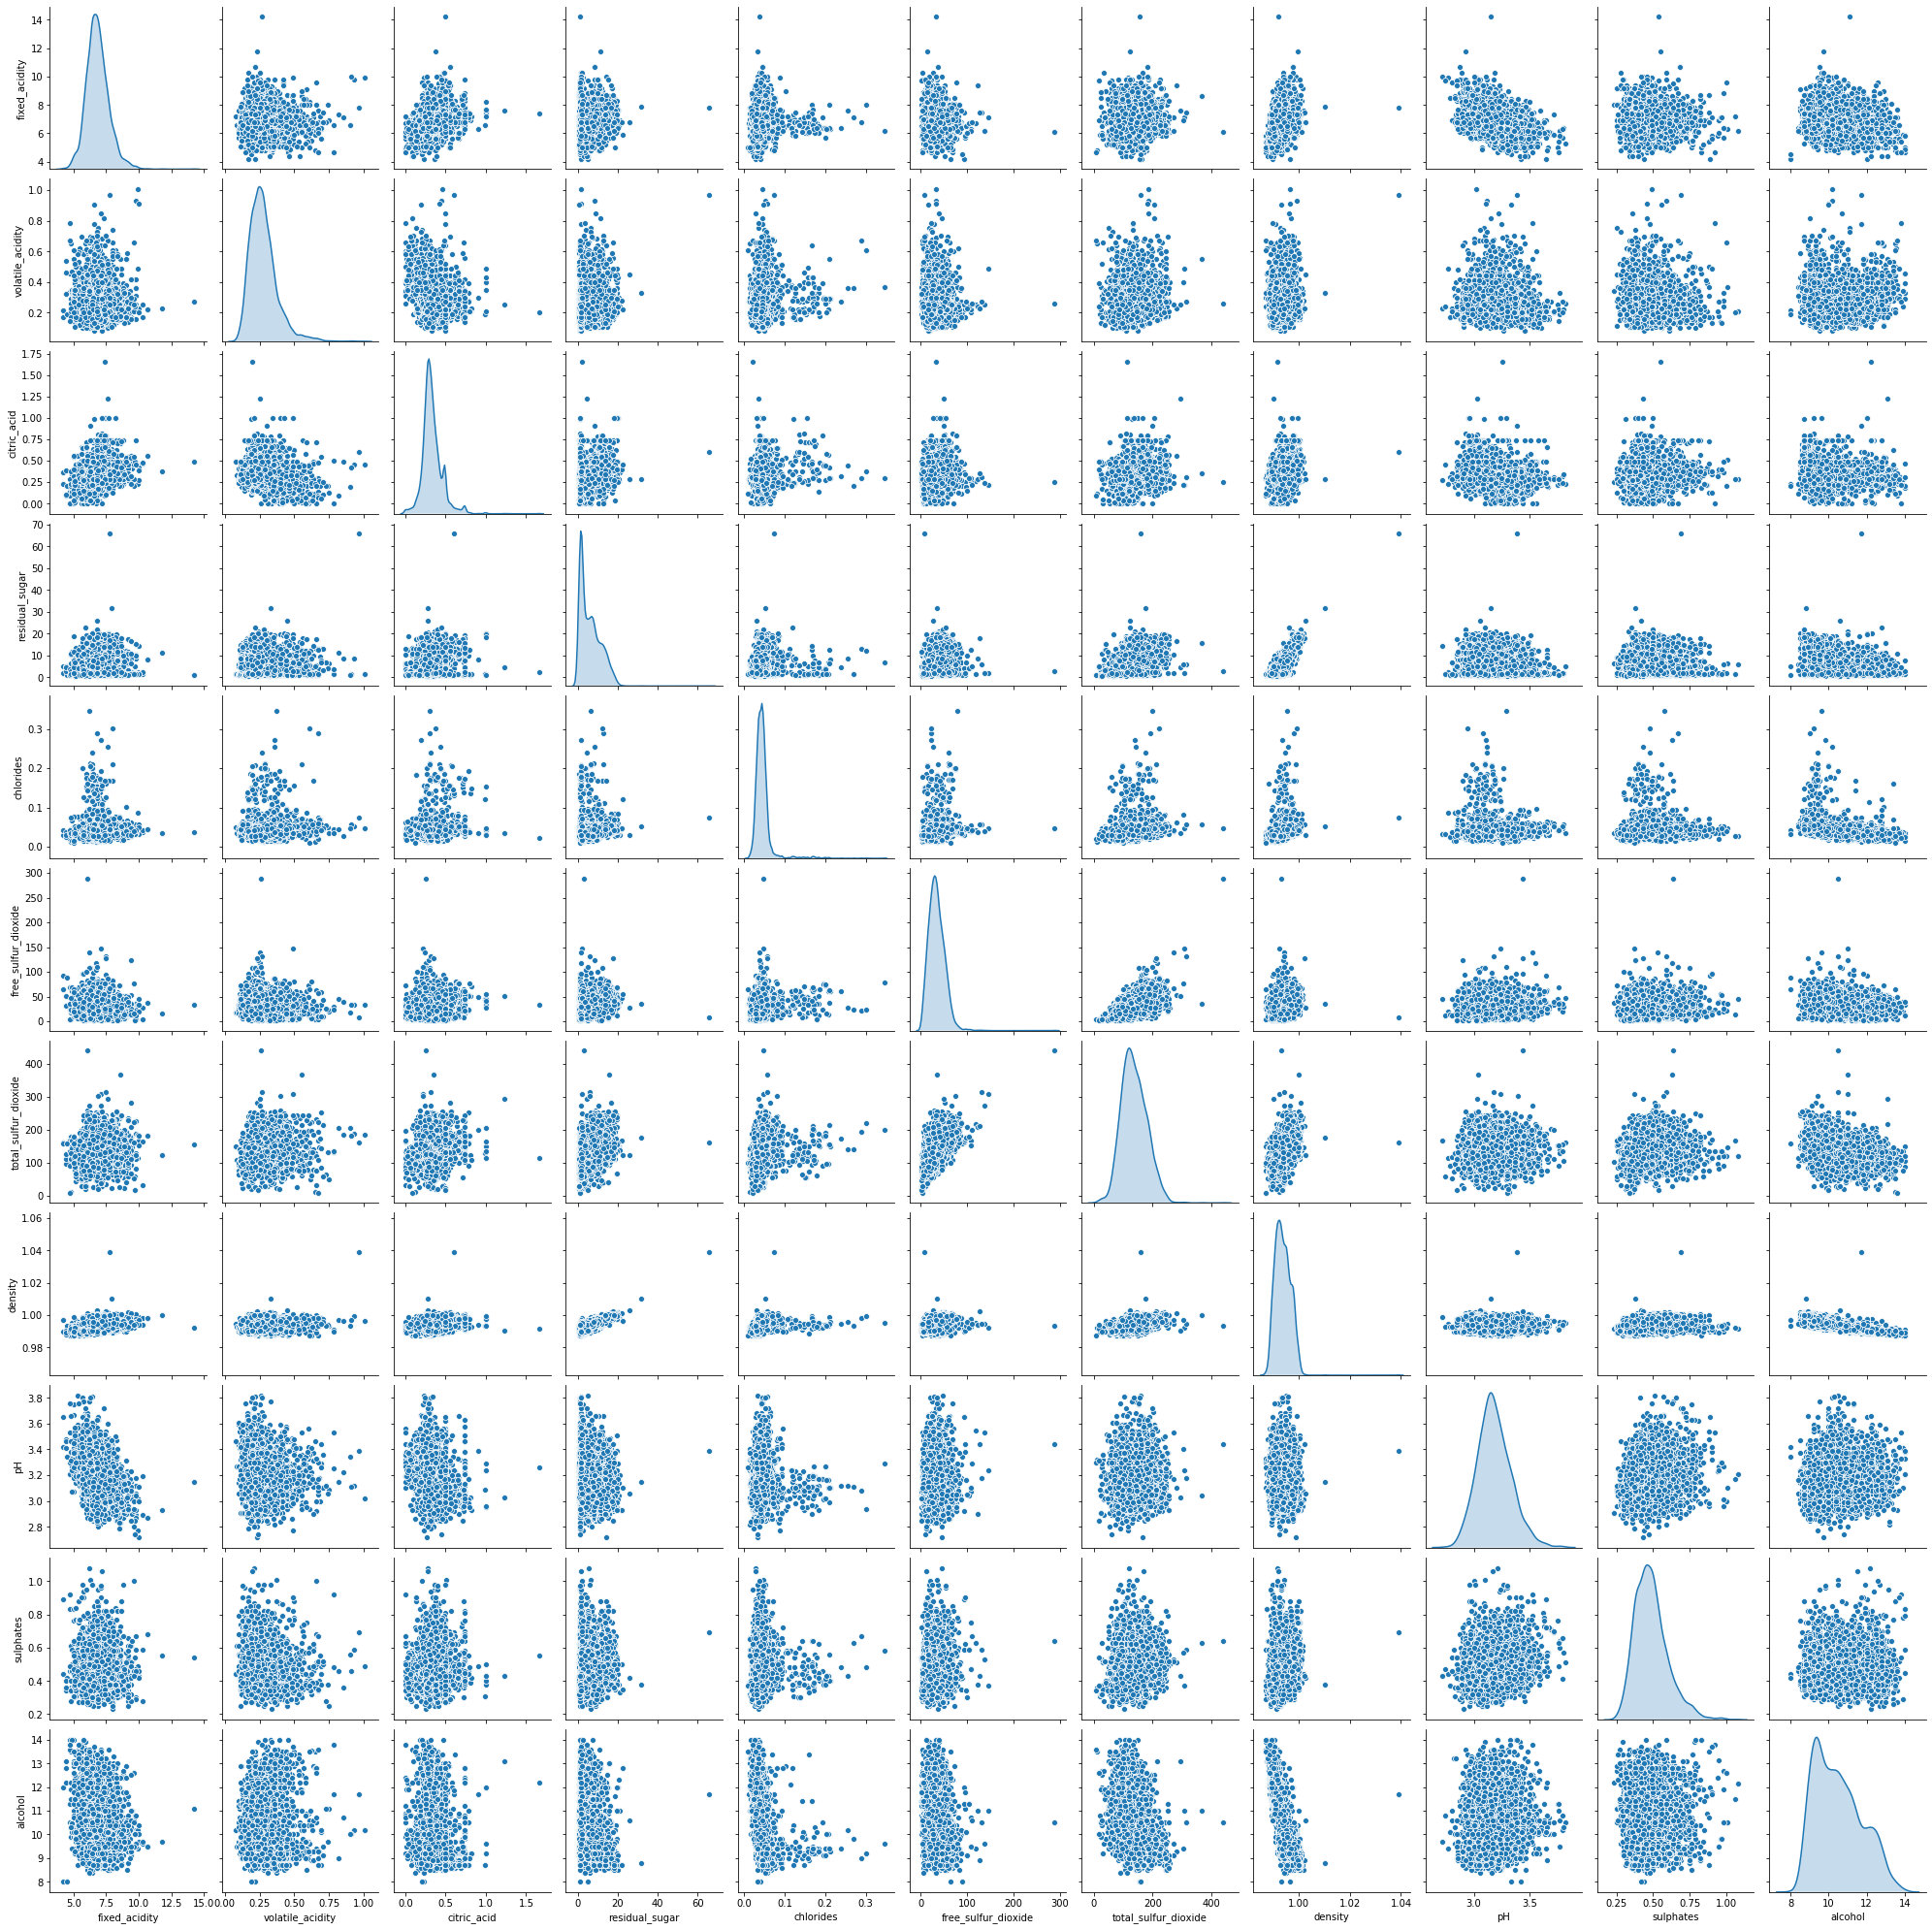

In [33]:
sns.pairplot(train_white[["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides",
                "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]], diag_kind="kde")

In [34]:
print(train_red.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.259348     0.672357   
volatile_acidity          -0.259348          1.000000    -0.557290   
citric_acid                0.672357         -0.557290     1.000000   
residual_sugar             0.096653         -0.007349     0.163277   
chlorides                  0.085494          0.079076     0.183634   
free_sulfur_dioxide       -0.160986         -0.036995    -0.058489   
total_sulfur_dioxide      -0.110269          0.042049     0.063142   
density                    0.669019          0.013261     0.373641   
pH                        -0.684791          0.233714    -0.534153   
sulphates                  0.186938         -0.252869     0.307618   
alcohol                   -0.068635         -0.193932     0.101513   
quality                    0.111620         -0.375704     0.211698   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [13]:
dataset_red.to_csv("data/dataset_red.csv")
dataset_white.to_csv("data/dataset_white.csv")